## Iniciando Dataset

In [41]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame=True)
df = data.frame

#print(df.info)

### Separando X e Y 

In [42]:
x = df.drop(columns=[data.target.name])
y = df[data.target.name]

### Separando Treino e Teste

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50,stratify=y)


### Criando modelos de classificação

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

modelos = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Neighborns': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000)
}

### Treinar os modelos

In [45]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_predict = modelo.predict(x_test)

    acuracia = accuracy_score(y_test, y_predict)
    precisao = precision_score(y_test, y_predict, average='weighted')
    matriz_confusao = confusion_matrix(y_test, y_predict)

    resultados[nome] = {
        'Acuracia': acuracia,
        'Precisão': precisao,
        'Matriz de Confusão': matriz_confusao
    }

    print(f'{nome} - Acurácia: {acuracia}')
    print(f'Precisão: {precisao}')
    print('Matriz de Confusão:')
    print(matriz_confusao)
    print('\n\n\n', classification_report(y_test, y_predict))

Decision Tree - Acurácia: 0.956140350877193
Precisão: 0.9560729421281235
Matriz de Confusão:
[[39  3]
 [ 2 70]]



               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

K-Neighborns - Acurácia: 0.9298245614035088
Precisão: 0.9330859199280251
Matriz de Confusão:
[[35  7]
 [ 1 71]]



               precision    recall  f1-score   support

           0       0.97      0.83      0.90        42
           1       0.91      0.99      0.95        72

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Logistic Regression - Acurácia: 0.9824561403508771
Precisão: 0.9829302987197724
Matriz de Confusão:
[[40  2]
 [ 0 

### Gráfico de comparação

C:\Users\Glauber\AppData\Local\Temp\ipykernel_8628\1896568809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette=['#ffa31a','#808080','#292929'])


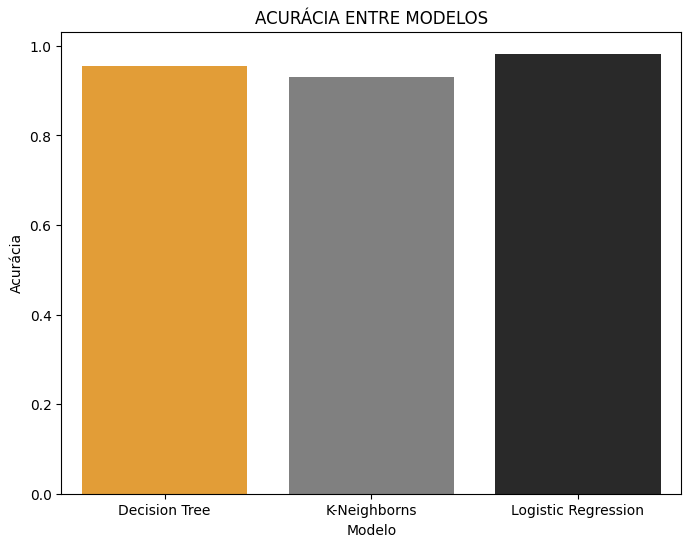

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


model_names = list(resultados.keys())
accuracies = [resultados[name]['Acuracia'] for name in model_names]

plt.figure(figsize=(8,6))
sns.barplot(x=model_names, y=accuracies, palette=['#ffa31a','#808080','#292929'])
plt.title('ACURÁCIA ENTRE MODELOS')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()

1 - Classificação supervisionada basicamente é a técnica de aprendizado de máquina em que o modelo aprende a atribuir categorias aos dados, nesse tipo de aprendizado cada dado de entrada já possui um rótulo conhecido, e o modelo utiliza essas informações para entender os padrões e criar uma relação entre as características dos dados e as categorias ai depois do treinamento o modelo consegue classificar novos dados em categorias antes já definidas.

2 - Dividir o dataset em treino e teste é para separar os dados em duas partes, uma que vai ensinar o modelo e outra que fica verificando se ele aprendeu mesmo, logo isso vai ajudar a garantir que o modelo consiga lidar quando tiver novos dados e não apenas memorizar os exemplos que ele já viu antes.

3- diferença entre decision Tree e KNN é como eles aprendem e decidem, decision Tree aprende durante o treinamento e usa decisões baseadas nas características dos dados até chegar à classificação final, enquanto KNN não aprende antes, apenas armazena os dados e na hora de classificar compara a nova entrada com os "K" vizinhos mais próximos e escolhe a categoria com base nesses vizinhos.